Reading in all Libraries

In [1]:
library('huge')

Loading required package: Matrix
Loading required package: lattice
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: MASS


Reading in Data File for Cluster 01 and 07. See this <a href=https://drive.google.com/file/d/0B3RuCbv7M3B9LXpNY2hmcVpqQnM/view?usp=sharing> link</a> for more details on cluster choice. I have chosen cl01 and cl07 for this analysis because they are similar in size and below to the same parent tree B.

In [2]:
#Analysing only one cluster to see if graph is reproducible in at least one cluster or not dude.
expressionData=read.table("01.cl01_nc",header=TRUE)
#cl07data=read.table("01.cl07_nc",header=TRUE)

Checking how many cells are in each cluster, and does this correspond to the linked figure above?

In [3]:
print("Number of Cells in Cluster:")
print(ncol(expressionData))

[1] "Number of Cells in Cluster:"
[1] 299


Reading in Gene Names for The Row Names

In [4]:
head(expressionData)
#Ok so we have no gene names we are good to go dude. Awesome man we can use this data directly

,X20141208A_1C83_S68,X20150112B_1C54_S12,X20141204B_1C11_S48,X20141208B_1C80_S75,X20141118A_1C21_S77,X20150112B_1C15_S76,X20141210A_1C80_S83,X20141203B_1C24_S94,X20141029A_1C50_S64,X20141118A_1C08_S42,ellip.h,X20140410_1C38_S54,X20141021A_1C45_S44,X20141202A_1C33_S86,X20150112A_1C72_S4,X20141022A_1C85_S78,X20141008A_1C77_S9,X20141029A_1C33_S28,X20150112A_1C94_S40,X20150112B_1C42_S82,X20141117A_1C79_S30
ENSG00000187634.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000188976.7,2.237258,0,4.528821,0.1375035,0,0,0,0,6.088375,0.2558028,⋯,0,0,0.5907218,0,0,0,0,0,0,0
ENSG00000187961.10,0,3.528821,0,2.275603,0,0,0,0,0,0,⋯,5.478875,0,0,0,0,0,0,0,1.076559,0
ENSG00000187583.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000188290.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000187608.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
expressionMatrix=as.matrix(t(expressionData))
print(dim(expressionMatrix))

[1]   299 16242


In [6]:
#Reducing the set of genes even more to see what happens. This code is behaving in a very weird way. What am I doing wrong?
#averageExpressionValues=apply(expressionMatrix,2,mean)
#print(averageExpressionValues[order(averageExpressionValues, decreasing = TRUE)][1:100])
#plot(averageExpressionValues[order(averageExpressionValues, decreasing = TRUE)])
#topgenes=order(averageExpressionValues, decreasing = TRUE)[1:50]
randomGenes=sample(1:ncol(expressionMatrix),size=50,replace=FALSE)
expressionMatrix=expressionMatrix[,randomGenes]

In [7]:
randomCells1=sample(1:nrow(expressionMatrix),size = 100,replace=FALSE)
print(head(randomCells1))
randomCells2=sample(1:nrow(expressionMatrix),size = 100,replace=FALSE)
print(head(randomCells2))
randomCellsFromExpressionMatrix1=expressionMatrix[randomCells1,]
print(dim(randomCellsFromExpressionMatrix1))
randomCellsFromExpressionMatrix2=expressionMatrix[randomCells2,]
print(dim(randomCellsFromExpressionMatrix2))

[1]  12  32 131 256 236  82
[1] 157  70  48 154  12   5
[1] 100  50
[1] 100  50


In [8]:
print("Everything except Graph model done")

graphModel1 = huge(randomCellsFromExpressionMatrix1, method="glasso", lambda=c(0.055))
output1=as.matrix(graphModel1$icov[[1]])
colnames(output1)=colnames(expressionMatrix)
write.table(output1,"graph_outputForRandomSample1.csv", sep=",", quote=FALSE, row.names = FALSE)
print("Done First!")

graphModel2 = huge(randomCellsFromExpressionMatrix2, method="glasso", lambda=c(0.055))
output2=as.matrix(graphModel2$icov[[1]])
colnames(output2)=colnames(expressionMatrix)
write.table(output2,"graph_outputForRandomSample2.csv", sep=",", quote=FALSE, row.names = FALSE)

print("Done Second!")
#######################################################################################################

[1] "Everything except Graph model done"
Conducting the graphical lasso (glasso)....done.                                          
[1] "Done First!"
Conducting the graphical lasso (glasso)....done.                                          
[1] "Done Second!"


In [9]:
print(dim(graphModel1$icov[[1]]))
print(dim(graphModel2$icov[[1]]))

[1] 50 50
[1] 50 50


In [10]:
#Getting Adjacency matrices and setting the diagnal to FALSE i.e. no self edges.
logicalOutput1=(output1!=0)
diag(logicalOutput1)=FALSE
logicalOutput2=(output2!=0)
diag(logicalOutput2)=FALSE
pdf("Edge_Distribution_Statistics.pdf")
edgeDistribution1=apply(logicalOutput1,2,sum)
hist(edgeDistribution1,100, main = "Edge Distribution for First Random Sample")
edgeDistribution2=apply(logicalOutput2,2,sum)
hist(edgeDistribution2,100, main = "Edge Distribution for Second Random Sample")

#Getting Intersection of both outputs
intersectofOutputs=((logicalOutput1+logicalOutput2)>1)
diag(intersectofOutputs)=FALSE

intersectEdgeDistribution=apply(intersectofOutputs,2,sum)
hist(intersectEdgeDistribution,100, main = "Edge Distribution for Intersect of Random Samples")
dev.off()

pdf 
  2

In [11]:
#sink("sparsityValues.txt")
print("Sparsity for Random Sample 1:")
sparsity1=sum(logicalOutput1)/(nrow(logicalOutput1)*ncol(logicalOutput1))
print(sparsity1)
print("Sparsity for Random Sample 2:")
sparsity2=sum(logicalOutput2)/(nrow(logicalOutput2)*ncol(logicalOutput2))
print(sparsity2)
print("Sparsity for Intersect of Random Samples:")
intersectSparsity=sum(intersectofOutputs)/(nrow(intersectofOutputs)*ncol(intersectofOutputs))
print(intersectSparsity)

[1] "Sparsity for Random Sample 1:"
[1] 0.5288
[1] "Sparsity for Random Sample 2:"
[1] 0.528
[1] "Sparsity for Intersect of Random Samples:"
[1] 0.3056


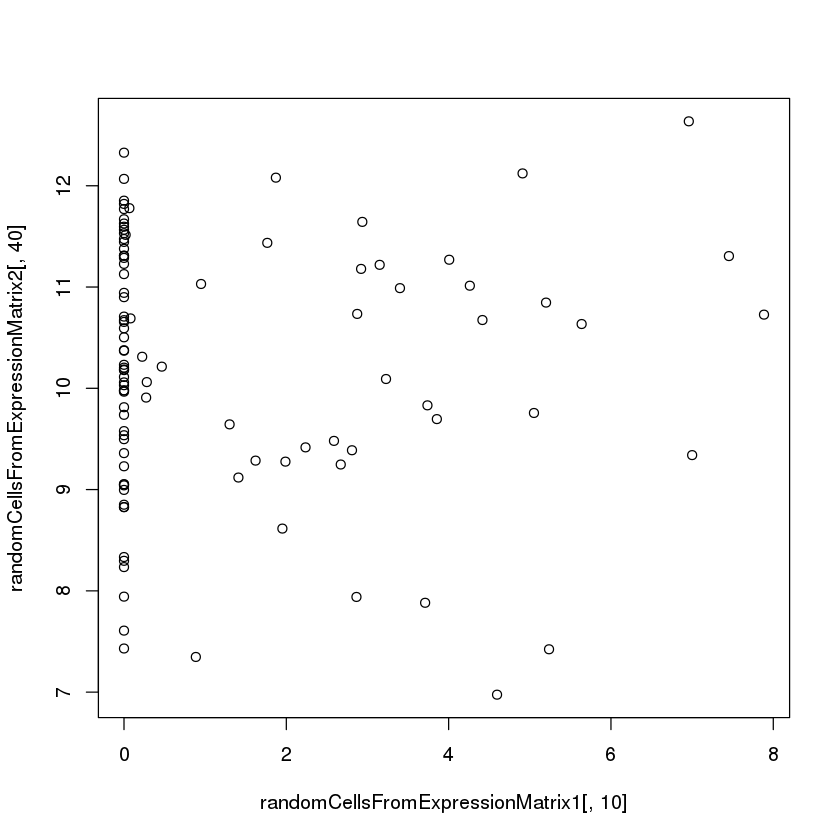

In [19]:
plot(randomCellsFromExpressionMatrix1[,10],randomCellsFromExpressionMatrix2[,40])
